In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Heart = pd.read_csv('SAHeart.csv')
Heart.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


#### 13. How many records are present in the dataset? Print the metadata information of the dataset.

In [3]:
Heart.shape

(462, 11)

In [4]:
Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


#### 14. Draw a bar plot to show the number of persons having CHD or not in comparison to they having family history of the disease or not.

<Axes: xlabel='chd', ylabel='famhist'>

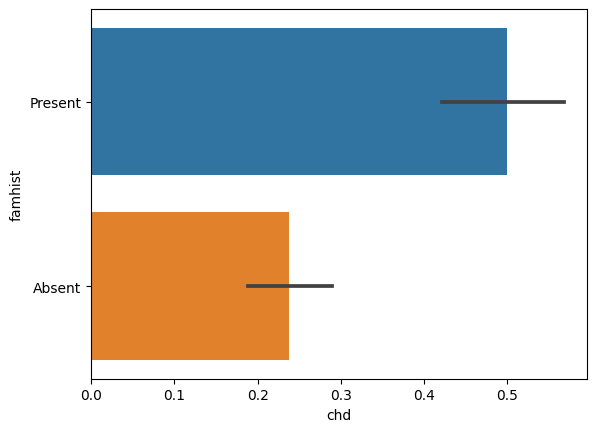

In [7]:
sns.barplot(x = 'chd',y = 'famhist',data = Heart)

#### 15. Does age have any correlation with sbp?

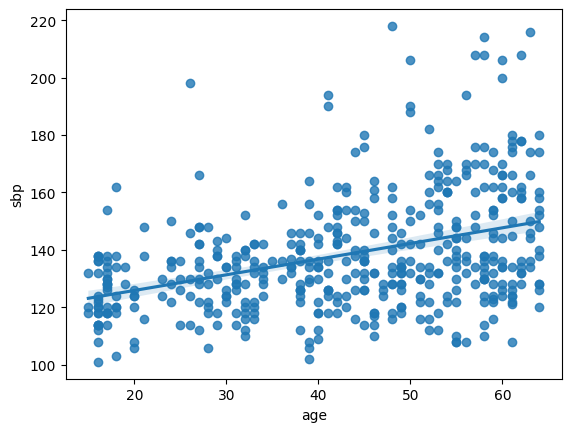

In [9]:
sns.regplot( x = 'age',
y = 'sbp',
data = Heart);

#### 16. Compare the distribution of tobacco consumption for persons having CHD and not having CHD. Can you interpret the effect of tobacco consumption on having coronary heart disease?

In [11]:
Heart.columns

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

/var/folders/xc/16dj9yzx3116nf3_z4ntqmnh0000gn/T/ipykernel_15368/918712258.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Heart['tobacco']);


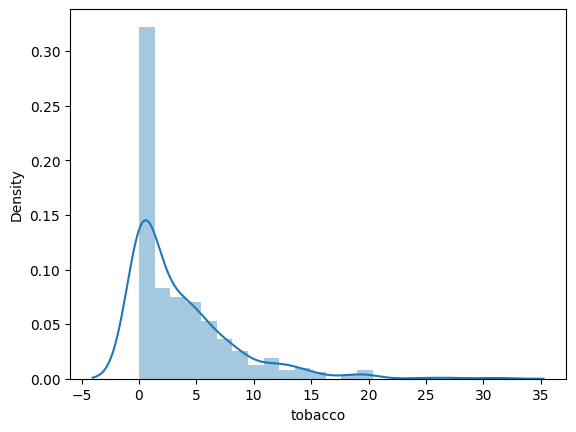

In [14]:
sns.distplot(Heart['tobacco']);

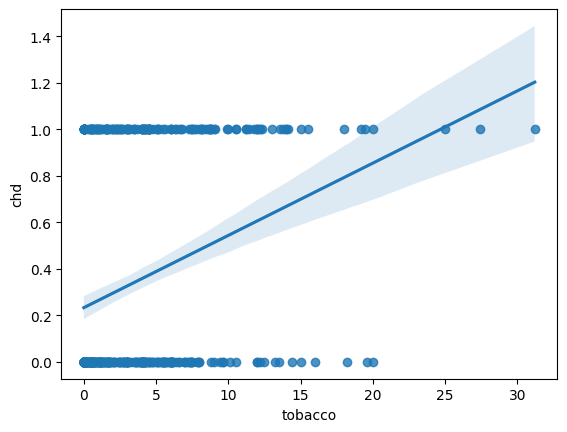

In [15]:
sns.regplot( x = 'tobacco',
y = 'chd',
data = Heart);

In [16]:
data_chd = Heart[Heart['chd'] == 1]

#### 17. How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the relationships.

/Users/tulsipatro/Dev/Basics/pythonenv/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


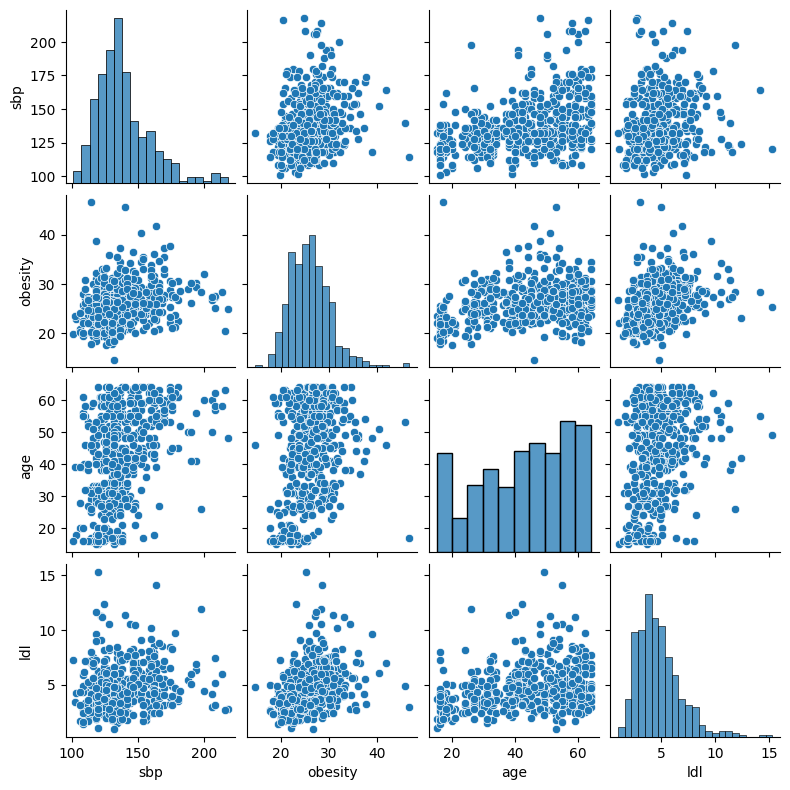

In [21]:
influential_features = ['sbp','obesity','age','ldl']

sns.pairplot(Heart[influential_features],size=2)

#### 18. Derive a new column called agegroup from age column where persons falling in different age ranges
are categorized as below.
  
  (0–15): young

  (15–35): adults

  (35–55): mid
  
  (55–): old

In [22]:
Heart.columns

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

In [25]:
category = pd.cut(Heart.age,bins=[0,15,35,55,99],labels=['Young','Adults','Mid','Old'])
Heart.insert(10,'Age_Group',category)

In [30]:
Heart.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,Age_Group,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Mid,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Old,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,Mid,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Old,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Mid,1


#### 19. Find out the number of CHD cases in different age categories. Do a barplot and sort them in the order of age groups.

In [32]:
Cross_tab = pd.crosstab( Heart['Age_Group'],Heart['chd'])
Cross_tab

chd,0,1
Age_Group,,
Young,3,0
Adults,123,18
Mid,123,81
Old,53,61


<Axes: xlabel='Age_Group', ylabel='chd'>

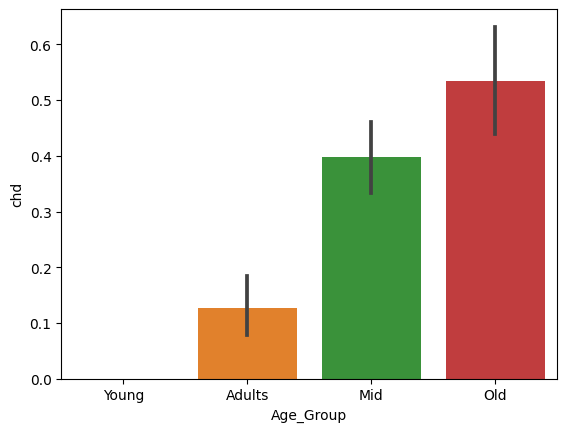

In [33]:
sns.barplot(x = 'Age_Group',y = 'chd',data = Heart)

#### 20. Draw a box plot to compare distributions of ldl for different age groups.

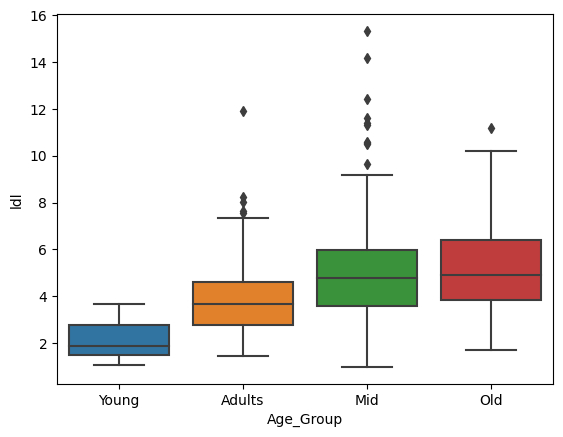

In [35]:
sns.boxplot( x = 'Age_Group', y = 'ldl', data = Heart);